In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
seed = 42

In [ ]:
df = pd.read_excel(r"/content/drive/MyDrive/MPHARM/00_MPH/Final/DTR_top 50.xlsx")
df

,pCC50,ATS5i,ATS7i,ATS8i,AATS0m,AATS1m,AATS2m,AATS3m,AATS4m,AATS5m,...,Mp,Mi,CrippenLogP,VE1_Dt,SIC5,CIC1,MIC2,piPC7,WPOL,XLogP
0,4.176200,11541.98,10794.65,9359.73,148.45,113.62,107.67,90.64,84.33,85.27,...,0.76,7.48,5.91,0.01,0.92,1.82,40.55,6.56,31,6.39
1,3.790995,11545.52,10794.67,9332.53,148.45,113.62,107.67,96.77,85.25,89.47,...,0.76,7.48,5.91,0.01,0.92,1.82,39.86,6.57,32,6.39
2,3.657321,11623.89,10910.69,9570.95,122.85,108.28,100.97,84.77,75.28,81.22,...,0.73,7.56,4.46,0.03,0.88,1.82,38.07,6.55,31,6.25
3,3.871568,11559.13,10810.36,9359.71,148.45,113.62,107.67,90.64,78.36,84.34,...,0.76,7.48,5.91,0.03,0.88,1.82,40.41,6.55,31,6.39
4,4.356745,11471.68,10658.99,9295.27,330.83,139.23,139.79,118.78,110.66,114.09,...,0.80,7.45,6.67,0.02,0.95,1.56,54.02,6.64,33,6.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.700929,14955.22,10799.99,9615.60,281.88,128.23,126.27,107.84,83.30,102.99,...,0.78,7.48,5.55,0.05,0.92,1.60,52.91,6.48,37,6.26
96,4.499078,16517.87,11822.44,11796.07,124.48,103.47,95.76,82.65,66.27,86.48,...,0.74,7.52,4.82,0.05,0.91,1.90,40.24,6.48,37,6.79
97,4.376441,17436.82,11647.11,11338.67,127.34,106.31,97.76,87.42,70.86,84.04,...,0.73,7.53,4.80,0.02,0.91,1.74,43.68,6.55,39,5.39
98,3.980344,15817.69,11713.90,10478.25,163.52,121.30,119.32,96.75,83.51,97.17,...,0.78,7.47,7.17,0.19,0.95,2.02,47.57,6.99,44,5.49


In [ ]:
print(df.columns)

Index(['pCC50', 'ATS5i', 'ATS7i', 'ATS8i', 'AATS0m', 'AATS1m', 'AATS2m',
       'AATS3m', 'AATS4m', 'AATS5m', 'AATS6m', 'AATS7m', 'AATS8m', 'AATS0v',
       'AATS1v', 'AATS2v', 'AATS3v', 'AATS6v', 'AATS4e', 'AATS5e', 'AATS2p',
       'AATS4p', 'AATS6p', 'AATS1i', 'AATS4i', 'AATS5i', 'ATSC7c', 'ATSC5v',
       'ATSC2e', 'ATSC6p', 'AATSC6m', 'AATSC6i', 'MATS1m', 'MATS2e', 'MATS4e',
       'GATS3c', 'GATS4m', 'GATS8v', 'GATS7p', 'Si', 'Mare', 'Mp', 'Mi',
       'CrippenLogP', 'VE1_Dt', 'SIC5', 'CIC1', 'MIC2', 'piPC7', 'WPOL',
       'XLogP'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 51 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pCC50        100 non-null    float64
 1   ATS5i        100 non-null    float64
 2   ATS7i        100 non-null    float64
 3   ATS8i        100 non-null    float64
 4   AATS0m       100 non-null    float64
 5   AATS1m       100 non-null    float64
 6   AATS2m       100 non-null    float64
 7   AATS3m       100 non-null    float64
 8   AATS4m       100 non-null    float64
 9   AATS5m       100 non-null    float64
 10  AATS6m       100 non-null    float64
 11  AATS7m       100 non-null    float64
 12  AATS8m       100 non-null    float64
 13  AATS0v       100 non-null    float64
 14  AATS1v       100 non-null    float64
 15  AATS2v       100 non-null    float64
 16  AATS3v       100 non-null    float64
 17  AATS6v       100 non-null    float64
 18  AATS4e       100 non-null    float64
 19  AATS5e   

In [ ]:
df.isnull()

,pCC50,ATS5i,ATS7i,ATS8i,AATS0m,AATS1m,AATS2m,AATS3m,AATS4m,AATS5m,...,Mp,Mi,CrippenLogP,VE1_Dt,SIC5,CIC1,MIC2,piPC7,WPOL,XLogP
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

pCC50          0
ATS5i          0
ATS7i          0
ATS8i          0
AATS0m         0
AATS1m         0
AATS2m         0
AATS3m         0
AATS4m         0
AATS5m         0
AATS6m         0
AATS7m         0
AATS8m         0
AATS0v         0
AATS1v         0
AATS2v         0
AATS3v         0
AATS6v         0
AATS4e         0
AATS5e         0
AATS2p         0
AATS4p         0
AATS6p         0
AATS1i         0
AATS4i         0
AATS5i         0
ATSC7c         0
ATSC5v         0
ATSC2e         0
ATSC6p         0
AATSC6m        0
AATSC6i        0
MATS1m         0
MATS2e         0
MATS4e         0
GATS3c         0
GATS4m         0
GATS8v         0
GATS7p         0
Si             0
Mare           0
Mp             0
Mi             0
CrippenLogP    0
VE1_Dt         0
SIC5           0
CIC1           0
MIC2           0
piPC7          0
WPOL           0
XLogP          0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df2 = df.fillna(value = 0) 
df2

,pCC50,ATS5i,ATS7i,ATS8i,AATS0m,AATS1m,AATS2m,AATS3m,AATS4m,AATS5m,...,Mp,Mi,CrippenLogP,VE1_Dt,SIC5,CIC1,MIC2,piPC7,WPOL,XLogP
0,4.176200,11541.98,10794.65,9359.73,148.45,113.62,107.67,90.64,84.33,85.27,...,0.76,7.48,5.91,0.01,0.92,1.82,40.55,6.56,31,6.39
1,3.790995,11545.52,10794.67,9332.53,148.45,113.62,107.67,96.77,85.25,89.47,...,0.76,7.48,5.91,0.01,0.92,1.82,39.86,6.57,32,6.39
2,3.657321,11623.89,10910.69,9570.95,122.85,108.28,100.97,84.77,75.28,81.22,...,0.73,7.56,4.46,0.03,0.88,1.82,38.07,6.55,31,6.25
3,3.871568,11559.13,10810.36,9359.71,148.45,113.62,107.67,90.64,78.36,84.34,...,0.76,7.48,5.91,0.03,0.88,1.82,40.41,6.55,31,6.39
4,4.356745,11471.68,10658.99,9295.27,330.83,139.23,139.79,118.78,110.66,114.09,...,0.80,7.45,6.67,0.02,0.95,1.56,54.02,6.64,33,6.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.700929,14955.22,10799.99,9615.60,281.88,128.23,126.27,107.84,83.30,102.99,...,0.78,7.48,5.55,0.05,0.92,1.60,52.91,6.48,37,6.26
96,4.499078,16517.87,11822.44,11796.07,124.48,103.47,95.76,82.65,66.27,86.48,...,0.74,7.52,4.82,0.05,0.91,1.90,40.24,6.48,37,6.79
97,4.376441,17436.82,11647.11,11338.67,127.34,106.31,97.76,87.42,70.86,84.04,...,0.73,7.53,4.80,0.02,0.91,1.74,43.68,6.55,39,5.39
98,3.980344,15817.69,11713.90,10478.25,163.52,121.30,119.32,96.75,83.51,97.17,...,0.78,7.47,7.17,0.19,0.95,2.02,47.57,6.99,44,5.49


In [ ]:
df2.isnull().sum().sum()

0

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 51 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pCC50        100 non-null    float64
 1   ATS5i        100 non-null    float64
 2   ATS7i        100 non-null    float64
 3   ATS8i        100 non-null    float64
 4   AATS0m       100 non-null    float64
 5   AATS1m       100 non-null    float64
 6   AATS2m       100 non-null    float64
 7   AATS3m       100 non-null    float64
 8   AATS4m       100 non-null    float64
 9   AATS5m       100 non-null    float64
 10  AATS6m       100 non-null    float64
 11  AATS7m       100 non-null    float64
 12  AATS8m       100 non-null    float64
 13  AATS0v       100 non-null    float64
 14  AATS1v       100 non-null    float64
 15  AATS2v       100 non-null    float64
 16  AATS3v       100 non-null    float64
 17  AATS6v       100 non-null    float64
 18  AATS4e       100 non-null    float64
 19  AATS5e   

In [ ]:
df2.describe()

,pCC50,ATS5i,ATS7i,ATS8i,AATS0m,AATS1m,AATS2m,AATS3m,AATS4m,AATS5m,...,Mp,Mi,CrippenLogP,VE1_Dt,SIC5,CIC1,MIC2,piPC7,WPOL,XLogP
count,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.152151,12810.99340,10739.108600,9767.487500,167.06950,115.903800,108.344800,94.160200,81.008100,85.903400,...,0.748400,7.506800,5.194100,0.068100,0.923000,1.772000,43.178000,6.467500,33.330000,5.668800
std,0.399805,2239.73349,2252.115759,2293.038724,78.40929,15.498864,19.536282,18.218968,16.695203,20.407856,...,0.039356,0.058394,1.039737,0.073878,0.029353,0.299468,6.458384,0.426298,5.099128,1.093768
min,3.443866,1632.12000,670.840000,126.790000,77.83000,85.920000,71.360000,59.530000,37.920000,38.360000,...,0.670000,7.160000,0.520000,0.000000,0.830000,0.630000,29.270000,4.840000,17.000000,3.310000
25%,3.794065,11511.30500,9663.600000,8584.582500,119.78750,105.252500,94.797500,82.640000,70.840000,72.332500,...,0.720000,7.480000,4.672500,0.020000,0.910000,1.630000,38.182500,6.390000,31.000000,4.962500
50%,4.278946,13077.32000,10779.705000,9593.275000,142.24000,114.960000,106.455000,91.890000,80.850000,84.805000,...,0.750000,7.505000,5.255000,0.050000,0.920000,1.765000,42.730000,6.530000,34.000000,5.765000
75%,4.461207,14161.66750,11825.157500,10862.300000,179.52750,125.452500,119.715000,106.827500,90.845000,97.527500,...,0.770000,7.540000,5.910000,0.070000,0.950000,1.970000,47.252500,6.652500,36.000000,6.415000
max,5.154902,17436.82000,18541.510000,15892.280000,498.06000,164.540000,173.770000,158.600000,155.160000,150.260000,...,0.930000,7.640000,7.540000,0.310000,0.990000,2.630000,59.480000,7.270000,45.000000,8.870000


In [ ]:
df2.head()

,pCC50,ATS5i,ATS7i,ATS8i,AATS0m,AATS1m,AATS2m,AATS3m,AATS4m,AATS5m,...,Mp,Mi,CrippenLogP,VE1_Dt,SIC5,CIC1,MIC2,piPC7,WPOL,XLogP
0,4.176200,11541.98,10794.65,9359.73,148.45,113.62,107.67,90.64,84.33,85.27,...,0.76,7.48,5.91,0.01,0.92,1.82,40.55,6.56,31,6.39
1,3.790995,11545.52,10794.67,9332.53,148.45,113.62,107.67,96.77,85.25,89.47,...,0.76,7.48,5.91,0.01,0.92,1.82,39.86,6.57,32,6.39
2,3.657321,11623.89,10910.69,9570.95,122.85,108.28,100.97,84.77,75.28,81.22,...,0.73,7.56,4.46,0.03,0.88,1.82,38.07,6.55,31,6.25
3,3.871568,11559.13,10810.36,9359.71,148.45,113.62,107.67,90.64,78.36,84.34,...,0.76,7.48,5.91,0.03,0.88,1.82,40.41,6.55,31,6.39
4,4.356745,11471.68,10658.99,9295.27,330.83,139.23,139.79,118.78,110.66,114.09,...,0.80,7.45,6.67,0.02,0.95,1.56,54.02,6.64,33,6.19


In [ ]:
df2.describe()

,pCC50,ATS5i,ATS7i,ATS8i,AATS0m,AATS1m,AATS2m,AATS3m,AATS4m,AATS5m,...,Mp,Mi,CrippenLogP,VE1_Dt,SIC5,CIC1,MIC2,piPC7,WPOL,XLogP
count,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.152151,12810.99340,10739.108600,9767.487500,167.06950,115.903800,108.344800,94.160200,81.008100,85.903400,...,0.748400,7.506800,5.194100,0.068100,0.923000,1.772000,43.178000,6.467500,33.330000,5.668800
std,0.399805,2239.73349,2252.115759,2293.038724,78.40929,15.498864,19.536282,18.218968,16.695203,20.407856,...,0.039356,0.058394,1.039737,0.073878,0.029353,0.299468,6.458384,0.426298,5.099128,1.093768
min,3.443866,1632.12000,670.840000,126.790000,77.83000,85.920000,71.360000,59.530000,37.920000,38.360000,...,0.670000,7.160000,0.520000,0.000000,0.830000,0.630000,29.270000,4.840000,17.000000,3.310000
25%,3.794065,11511.30500,9663.600000,8584.582500,119.78750,105.252500,94.797500,82.640000,70.840000,72.332500,...,0.720000,7.480000,4.672500,0.020000,0.910000,1.630000,38.182500,6.390000,31.000000,4.962500
50%,4.278946,13077.32000,10779.705000,9593.275000,142.24000,114.960000,106.455000,91.890000,80.850000,84.805000,...,0.750000,7.505000,5.255000,0.050000,0.920000,1.765000,42.730000,6.530000,34.000000,5.765000
75%,4.461207,14161.66750,11825.157500,10862.300000,179.52750,125.452500,119.715000,106.827500,90.845000,97.527500,...,0.770000,7.540000,5.910000,0.070000,0.950000,1.970000,47.252500,6.652500,36.000000,6.415000
max,5.154902,17436.82000,18541.510000,15892.280000,498.06000,164.540000,173.770000,158.600000,155.160000,150.260000,...,0.930000,7.640000,7.540000,0.310000,0.990000,2.630000,59.480000,7.270000,45.000000,8.870000


In [ ]:
X = df2.drop(['pCC50'],axis = 1)
X

,ATS5i,ATS7i,ATS8i,AATS0m,AATS1m,AATS2m,AATS3m,AATS4m,AATS5m,AATS6m,...,Mp,Mi,CrippenLogP,VE1_Dt,SIC5,CIC1,MIC2,piPC7,WPOL,XLogP
0,11541.98,10794.65,9359.73,148.45,113.62,107.67,90.64,84.33,85.27,73.70,...,0.76,7.48,5.91,0.01,0.92,1.82,40.55,6.56,31,6.39
1,11545.52,10794.67,9332.53,148.45,113.62,107.67,96.77,85.25,89.47,93.29,...,0.76,7.48,5.91,0.01,0.92,1.82,39.86,6.57,32,6.39
2,11623.89,10910.69,9570.95,122.85,108.28,100.97,84.77,75.28,81.22,66.82,...,0.73,7.56,4.46,0.03,0.88,1.82,38.07,6.55,31,6.25
3,11559.13,10810.36,9359.71,148.45,113.62,107.67,90.64,78.36,84.34,69.87,...,0.76,7.48,5.91,0.03,0.88,1.82,40.41,6.55,31,6.39
4,11471.68,10658.99,9295.27,330.83,139.23,139.79,118.78,110.66,114.09,124.38,...,0.80,7.45,6.67,0.02,0.95,1.56,54.02,6.64,33,6.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14955.22,10799.99,9615.60,281.88,128.23,126.27,107.84,83.30,102.99,95.22,...,0.78,7.48,5.55,0.05,0.92,1.60,52.91,6.48,37,6.26
96,16517.87,11822.44,11796.07,124.48,103.47,95.76,82.65,66.27,86.48,72.32,...,0.74,7.52,4.82,0.05,0.91,1.90,40.24,6.48,37,6.79
97,17436.82,11647.11,11338.67,127.34,106.31,97.76,87.42,70.86,84.04,69.66,...,0.73,7.53,4.80,0.02,0.91,1.74,43.68,6.55,39,5.39
98,15817.69,11713.90,10478.25,163.52,121.30,119.32,96.75,83.51,97.17,89.89,...,0.78,7.47,7.17,0.19,0.95,2.02,47.57,6.99,44,5.49


In [ ]:
Y = df2.pCC50
Y

0     4.176200
1     3.790995
2     3.657321
3     3.871568
4     4.356745
        ...   
95    4.700929
96    4.499078
97    4.376441
98    3.980344
99    4.311669
Name: pCC50, Length: 100, dtype: float64

In [ ]:
X.shape

(100, 50)

In [ ]:
Y.shape

(100,)

In [ ]:
corr = df2.corr()

In [ ]:
corr

,pCC50,ATS5i,ATS7i,ATS8i,AATS0m,AATS1m,AATS2m,AATS3m,AATS4m,AATS5m,...,Mp,Mi,CrippenLogP,VE1_Dt,SIC5,CIC1,MIC2,piPC7,WPOL,XLogP
pCC50,1.000000,0.351351,0.383384,0.340336,0.106193,-0.054416,-0.041960,-0.114889,-0.052016,0.025442,...,0.025342,-0.117050,0.440497,0.022356,0.047163,0.368772,0.039869,0.459205,0.310898,0.471954
ATS5i,0.351351,1.000000,0.762293,0.776224,-0.165595,-0.324487,-0.334234,-0.350013,-0.395041,-0.223074,...,-0.347469,0.158451,0.395966,0.026980,0.104997,0.632689,-0.065446,0.705164,0.782273,0.484951
ATS7i,0.383384,0.762293,1.000000,0.933100,-0.247950,-0.394367,-0.385305,-0.418588,-0.319957,-0.236688,...,-0.339831,0.113873,0.512395,-0.046087,0.085680,0.681518,-0.222319,0.785421,0.633712,0.662002
ATS8i,0.340336,0.776224,0.933100,1.000000,-0.267737,-0.440577,-0.423666,-0.459115,-0.389891,-0.269540,...,-0.376551,0.152092,0.403090,-0.159328,0.011781,0.655096,-0.230706,0.751066,0.592066,0.592230
AATS0m,0.106193,-0.165595,-0.247950,-0.267737,1.000000,0.872022,0.883278,0.825138,0.726387,0.784082,...,0.723679,-0.492368,0.381901,-0.027053,0.130154,-0.299669,0.889401,0.043427,0.185799,-0.002341
AATS1m,-0.054416,-0.324487,-0.394367,-0.440577,0.872022,1.000000,0.986933,0.965728,0.922424,0.915051,...,0.882937,-0.642706,0.215690,0.064403,0.294948,-0.482074,0.911272,-0.027676,0.207632,-0.171766
AATS2m,-0.041960,-0.334234,-0.385305,-0.423666,0.883278,0.986933,1.000000,0.950476,0.911712,0.933945,...,0.911314,-0.657528,0.240246,0.039652,0.262567,-0.500625,0.913434,-0.023605,0.186755,-0.136132
AATS3m,-0.114889,-0.350013,-0.418588,-0.459115,0.825138,0.965728,0.950476,1.000000,0.942546,0.897801,...,0.854542,-0.656434,0.104816,0.120944,0.262947,-0.555531,0.871745,-0.120357,0.158273,-0.224990
AATS4m,-0.052016,-0.395041,-0.319957,-0.389891,0.726387,0.922424,0.911712,0.942546,1.000000,0.901575,...,0.869732,-0.714971,0.130864,0.102657,0.319536,-0.508220,0.783572,-0.024782,0.161027,-0.134128
AATS5m,0.025442,-0.223074,-0.236688,-0.269540,0.784082,0.915051,0.933945,0.897801,0.901575,1.000000,...,0.921769,-0.749274,0.276757,-0.011980,0.202918,-0.392785,0.841368,0.084037,0.285810,0.032544


In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,pCC50,ATS5i,ATS7i,ATS8i,AATS0m,AATS1m,AATS2m,AATS3m,AATS4m,AATS5m,AATS6m,AATS7m,AATS8m,AATS0v,AATS1v,AATS2v,AATS3v,AATS6v,AATS4e,AATS5e,AATS2p,AATS4p,AATS6p,AATS1i,AATS4i,AATS5i,ATSC7c,ATSC5v,ATSC2e,ATSC6p,AATSC6m,AATSC6i,MATS1m,MATS2e,MATS4e,GATS3c,GATS4m,GATS8v,GATS7p,Si,Mare,Mp,Mi,CrippenLogP,VE1_Dt,SIC5,CIC1,MIC2,piPC7,WPOL,XLogP
pCC50,1.000000,0.351351,0.383384,0.340336,0.106193,-0.054416,-0.041960,-0.114889,-0.052016,0.025442,-0.058568,-0.020397,0.070786,-0.036338,-0.014809,-0.003484,-0.090970,-0.113594,-0.291119,-0.140837,0.067162,-0.008052,-0.033241,-0.258865,-0.084104,-0.001780,-0.061689,-0.037603,-0.105915,-0.055652,-0.102039,0.195723,0.057611,-0.000373,0.214754,-0.077440,-0.380954,0.075835,0.087074,0.308962,-0.317161,0.025342,-0.117050,0.440497,0.022356,0.047163,0.368772,0.039869,0.459205,0.310898,0.471954
ATS5i,0.351351,1.000000,0.762293,0.776224,-0.165595,-0.324487,-0.334234,-0.350013,-0.395041,-0.223074,-0.270108,-0.229184,-0.025681,-0.429658,-0.362224,-0.353265,-0.373045,-0.511875,-0.490289,-0.309399,-0.212396,-0.257481,-0.386023,-0.230102,-0.117276,0.227409,0.139820,0.035516,0.368760,-0.034754,-0.119552,0.053450,0.072489,0.388821,0.216833,-0.189762,-0.059353,0.200521,0.209816,0.957861,-0.401600,-0.347469,0.158451,0.395966,0.026980,0.104997,0.632689,-0.065446,0.705164,0.782273,0.484951
ATS7i,0.383384,0.762293,1.000000,0.933100,-0.247950,-0.394367,-0.385305,-0.418588,-0.319957,-0.236688,-0.352306,-0.344605,-0.281917,-0.390774,-0.294114,-0.279522,-0.379616,-0.385314,-0.333146,-0.111848,-0.187286,-0.252401,-0.296203,-0.363185,0.034407,-0.020352,0.207268,-0.309148,0.272086,-0.007609,-0.043142,0.163774,-0.077895,0.325087,0.321338,-0.059830,-0.282438,0.285696,0.265083,0.714080,-0.445457,-0.339831,0.113873,0.512395,-0.046087,0.085680,0.681518,-0.222319,0.785421,0.633712,0.662002
ATS8i,0.340336,0.776224,0.933100,1.000000,-0.267737,-0.440577,-0.423666,-0.459115,-0.389891,-0.269540,-0.380851,-0.332616,-0.295416,-0.428829,-0.342772,-0.317328,-0.383517,-0.399309,-0.423486,-0.193151,-0.239277,-0.314889,-0.334690,-0.277106,0.054712,0.053261,0.334055,-0.262876,0.279410,0.107962,-0.032653,0.312132,-0.054294,0.359073,0.270046,-0.156858,-0.288473,0.283364,0.208588,0.725339,-0.449603,-0.376551,0.152092,0.403090,-0.159328,0.011781,0.655096,-0.230706,0.751066,0.592066,0.592230
AATS0m,0.106193,-0.165595,-0.247950,-0.267737,1.000000,0.872022,0.883278,0.825138,0.726387,0.784082,0.833888,0.824045,0.799578,0.611160,0.540500,0.528332,0.408568,0.375675,0.174392,0.262641,0.697897,0.618915,0.571854,-0.214219,-0.392829,-0.177677,0.045594,0.192480,-0.005035,-0.228782,-0.188395,-0.204632,-0.217481,-0.072835,-0.177904,-0.191740,-0.160194,-0.051040,-0.320380,-0.051416,0.215936,0.723679,-0.492368,0.381901,-0.027053,0.130154,-0.299669,0.889401,0.043427,0.185799,-0.002341
AATS1m,-0.054416,-0.324487,-0.394367,-0.440577,0.872022,1.000000,0.986933,0.965728,0.922424,0.915051,0.953865,0.891929,0.885362,0.858674,0.811841,0.790778,0.704405,0.649023,0.493720,0.520911,0.859226,0.842362,0.744255,-0.218043,-0.567272,-0.421644,-0.016994,0.150316,0.007906,-0.277902,-0.153882,-0.422646,-0.163239,-0.269309,-0.206770,-0.329238,0.025015,-0.330445,-0.399679,-0.174055,0.570910,0.882937,-0.642706,0.215690,0.064403,0.294948,-0.482074,0.911272,-0.027676,0.207632,-0.171766
AATS2m,-0.041960,-0.334234,-0.385305,-0.423666,0.883278,0.986933,1.000000,0.950476,0.911712,0.933945,0.943367,0.929008,0.869227,0.866321,0.805876,0.801984,0.708043,0.667916,0.459383,0.488237,0.865381,0.841302,0.789725,-0.183162,-0.541585,-0.404735,0.054435,0.204427,0.026886,-0.287783,-0.215069,-0.322235,-0.283930,-0.200890,-0.224572,-0.361483,-0.085880,-0.231975,-0.384605,-0.211093,0.523260,0.911314,-0.657528,0.240246,0.039652,0.262567,-0.500625,0.913434,-0.023605,0.186755,-0.136132
AATS3m,-0.114889,-0.350013,-0.418588,-0.459115,0.825138,0.965728,0.950476,1.000000,0.942546,0.897801,0.948261,0.830310,0.847341,0.843513,0.790234,0.758033,0.768121,0.678920,0.503379,0.507778,0.799850,0.858251,0.756330,-0.23

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=seed)

In [ ]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(80, 50) (20, 50) (80,) (20,)


In [ ]:
X_train

,ATS5i,ATS7i,ATS8i,AATS0m,AATS1m,AATS2m,AATS3m,AATS4m,AATS5m,AATS6m,...,Mp,Mi,CrippenLogP,VE1_Dt,SIC5,CIC1,MIC2,piPC7,WPOL,XLogP
55,13545.87,12826.37,12704.29,124.26,108.18,96.63,85.44,75.20,71.75,64.40,...,0.72,7.55,4.78,0.09,0.95,1.80,42.51,6.75,36,5.10
88,12671.58,9755.80,10020.67,168.33,120.48,116.82,95.34,81.44,107.94,94.18,...,0.78,7.48,5.36,0.04,0.90,1.57,47.49,6.46,34,6.24
26,9430.15,9090.16,6304.79,165.43,121.58,115.95,110.99,90.95,93.63,79.76,...,0.73,7.58,3.35,0.25,0.93,1.02,46.13,5.62,28,3.35
42,1632.12,670.84,126.79,155.39,155.72,157.65,158.60,155.16,150.26,149.06,...,0.93,7.16,0.52,0.12,0.92,0.63,43.89,4.84,17,3.31
69,13260.62,10255.50,7978.00,143.55,117.27,106.03,92.19,73.62,75.73,78.33,...,0.75,7.50,5.04,0.05,0.93,1.77,43.28,6.30,33,4.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,14150.57,11820.32,9983.22,262.86,131.23,124.01,115.90,98.16,104.52,102.67,...,0.78,7.43,6.22,0.26,0.98,2.14,48.32,7.04,41,6.80
71,12287.37,9576.37,9555.51,143.55,117.27,106.03,95.90,76.79,85.56,87.90,...,0.75,7.50,4.98,0.05,0.92,1.77,43.13,6.30,33,5.12
14,12680.26,11482.30,10725.34,125.59,112.68,104.48,88.66,79.26,85.39,68.59,...,0.73,7.55,4.98,0.06,0.93,1.80,41.11,6.67,35,6.18
92,12654.81,9727.07,9988.21,299.82,133.50,133.25,109.63,88.69,115.82,102.82,...,0.79,7.46,5.47,0.04,0.90,1.57,53.44,6.46,34,6.57


In [ ]:
Y_train

55    4.479516
88    3.980344
26    4.311580
42    3.454174
69    3.797239
        ...   
60    4.515415
71    4.472757
14    4.316413
92    3.930369
51    4.434270
Name: pCC50, Length: 80, dtype: float64

In [ ]:
X_test

,ATS5i,ATS7i,ATS8i,AATS0m,AATS1m,AATS2m,AATS3m,AATS4m,AATS5m,AATS6m,...,Mp,Mi,CrippenLogP,VE1_Dt,SIC5,CIC1,MIC2,piPC7,WPOL,XLogP
83,13611.10,9844.08,8665.82,299.82,133.50,133.25,111.39,90.81,110.80,108.21,...,0.79,7.46,5.52,0.00,0.94,1.57,53.21,6.45,35,5.94
53,13452.55,12027.92,11992.00,125.40,107.99,99.13,81.91,74.30,68.91,66.69,...,0.72,7.57,4.09,0.06,0.96,1.74,42.09,6.73,34,4.05
70,12458.79,9626.53,9685.01,121.16,112.57,100.21,88.07,71.49,79.44,79.78,...,0.72,7.56,4.47,0.05,0.92,1.77,41.01,6.30,33,4.98
45,12711.46,10521.78,10419.21,82.66,91.11,77.29,63.24,54.54,55.61,45.62,...,0.70,7.54,4.99,0.04,0.91,2.20,32.61,6.46,28,6.40
44,10079.98,6561.33,6663.66,77.83,85.92,71.36,59.53,37.92,38.36,44.29,...,0.67,7.64,3.36,0.07,0.90,1.76,31.67,5.26,19,3.92
39,11105.37,9548.09,8370.28,310.33,131.84,126.99,105.10,98.76,97.42,113.60,...,0.77,7.49,6.38,0.01,0.95,1.74,50.34,6.54,30,5.76
22,14478.57,15086.97,13552.71,103.23,95.98,84.82,72.81,67.39,75.03,59.88,...,0.71,7.52,5.76,0.00,0.91,2.03,36.48,6.60,33,7.18
80,14998.80,10661.99,9415.62,126.73,119.03,105.38,95.90,83.13,76.36,79.60,...,0.71,7.56,4.08,0.04,0.94,1.71,44.40,6.46,39,4.79
10,16276.92,12727.45,12021.01,103.23,95.98,86.37,77.17,61.31,61.61,60.89,...,0.71,7.52,5.31,0.06,0.90,2.08,35.96,6.60,34,7.15
0,11541.98,10794.65,9359.73,148.45,113.62,107.67,90.64,84.33,85.27,73.70,...,0.76,7.48,5.91,0.01,0.92,1.82,40.55,6.56,31,6.39


In [ ]:
Y_test

83    4.566390
53    3.584192
70    4.421705
45    4.567993
44    3.505678
39    4.784891
22    4.271241
80    3.793255
10    4.255081
0     4.176200
18    3.742826
30    4.340750
73    4.092696
33    3.727857
90    5.154902
4     4.356745
76    4.377061
77    3.475799
12    4.353694
31    4.171598
Name: pCC50, dtype: float64

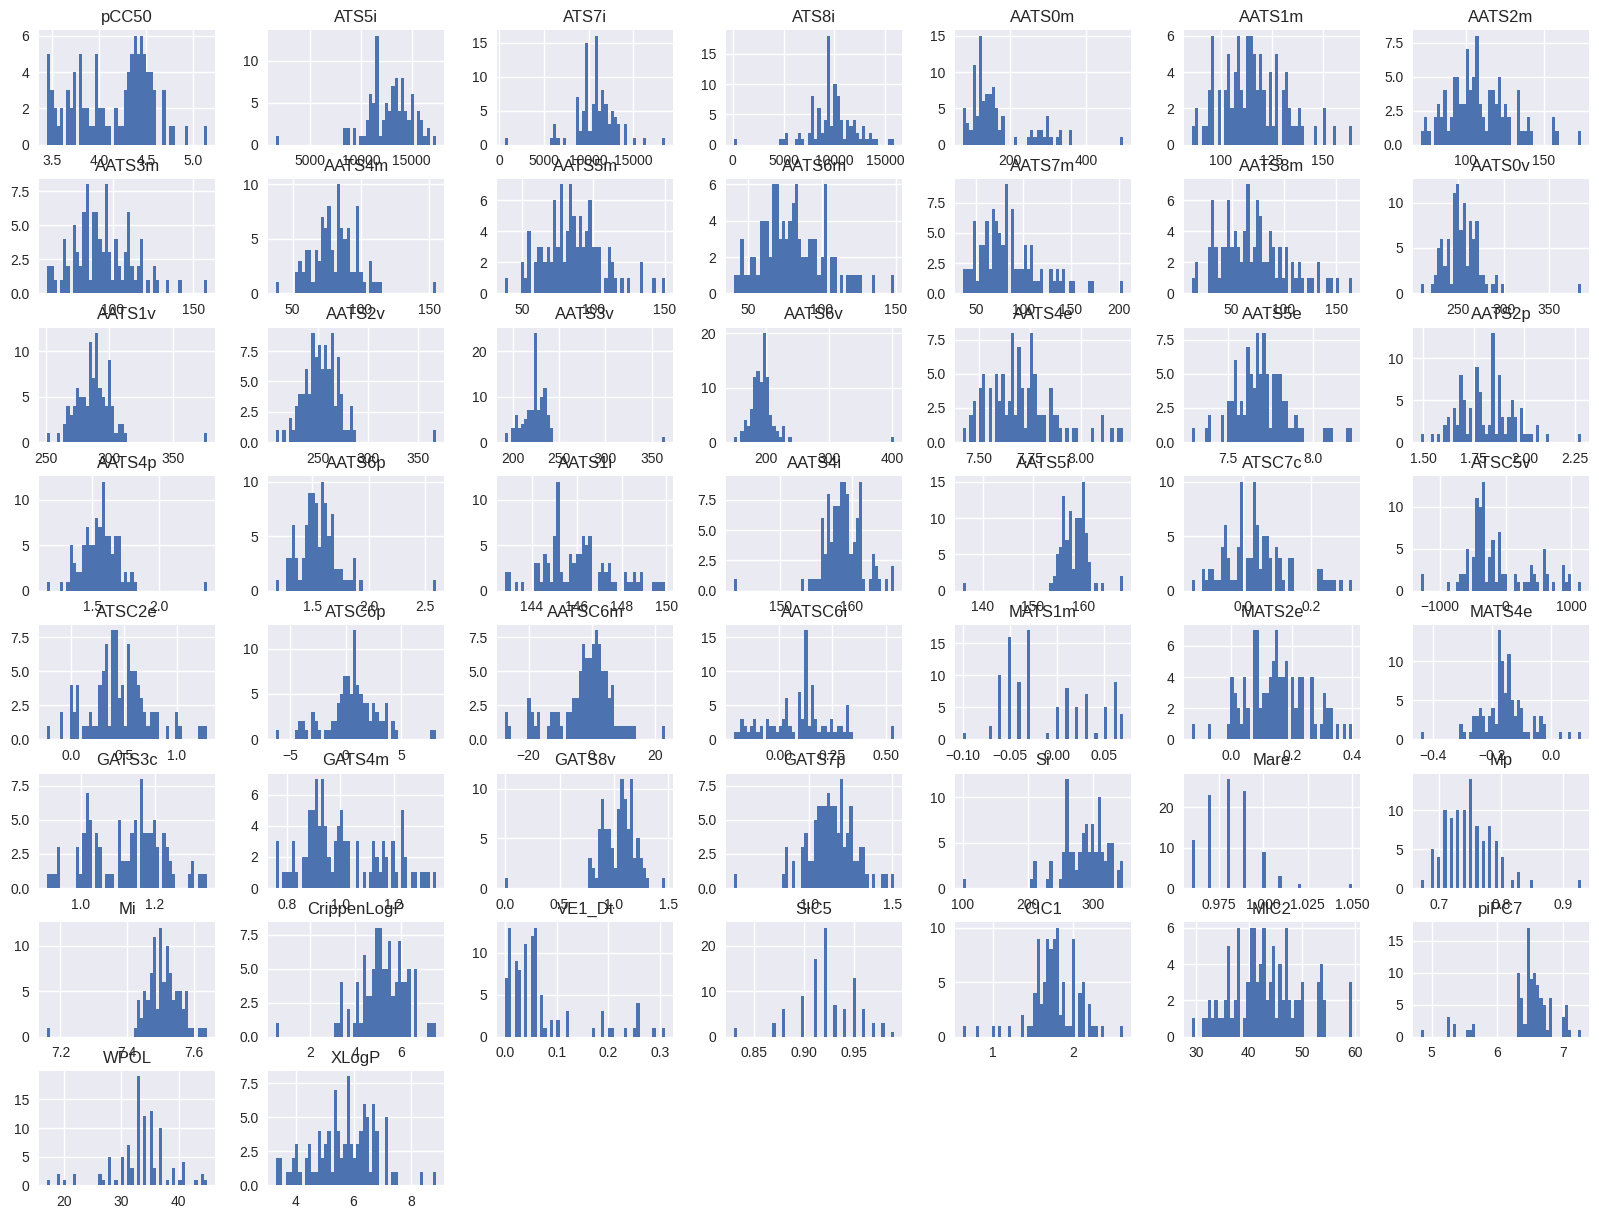

In [ ]:
df2.hist(bins = 50, figsize=(20,15))
plt.show()

In [ ]:
model = DecisionTreeRegressor(random_state=seed)

In [ ]:
model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
Y_train_pred = model.predict(X_train)

In [ ]:
print(Y_train_pred)

[4.47951647 3.98034377 4.31158018 3.45417353 3.79723931 3.96565234
 4.92299567 4.49907776 3.71835314 4.4059391  4.35418488 4.55486303
 4.69271795 4.41998789 4.59791065 4.47833898 3.52258931 3.48090739
 4.49417197 4.05428529 4.68951911 4.3750994  4.38933984 4.70092874
 3.71172841 3.44386642 3.45140178 3.57583734 4.54045674 3.83232828
 3.72053839 3.87156842 3.58599655 4.75745857 4.30137757 3.52459034
 4.50933935 3.46157709 4.46281077 3.99610883 3.79433559 4.31166918
 3.78965472 3.67023612 4.46293686 3.65615831 4.51116737 3.49284604
 4.53224395 4.37644061 4.58888558 4.28249593 4.46017144 3.97183558
 3.98034377 4.37561476 3.83182674 3.92071019 4.59842715 4.4529641
 4.46067294 3.95927902 4.27539648 4.00261362 3.79099464 4.34969248
 4.40938105 3.65732077 4.43997375 4.09691001 4.0549748  3.88372441
 3.69897    4.22745827 4.37028467 4.51541547 4.47275688 4.31641268
 3.9303689  4.43427021]


In [ ]:
predictions1 = pd.DataFrame({'Y_train' : Y_train, 'Y_train_pred' : Y_train_pred})

In [ ]:
predictions1

,Y_train,Y_train_pred
55,4.479516,4.479516
88,3.980344,3.980344
26,4.311580,4.311580
42,3.454174,3.454174
69,3.797239,3.797239
...,...,...
60,4.515415,4.515415
71,4.472757,4.472757
14,4.316413,4.316413
92,3.930369,3.930369


In [ ]:
len(Y_train_pred)

80

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train))

The training r_sq is: 1.0000


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_pred))

The MAE is: 0.0000


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_pred)))

The RMSE is: 0.0000


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_pred))

The EVS is: 1.0000


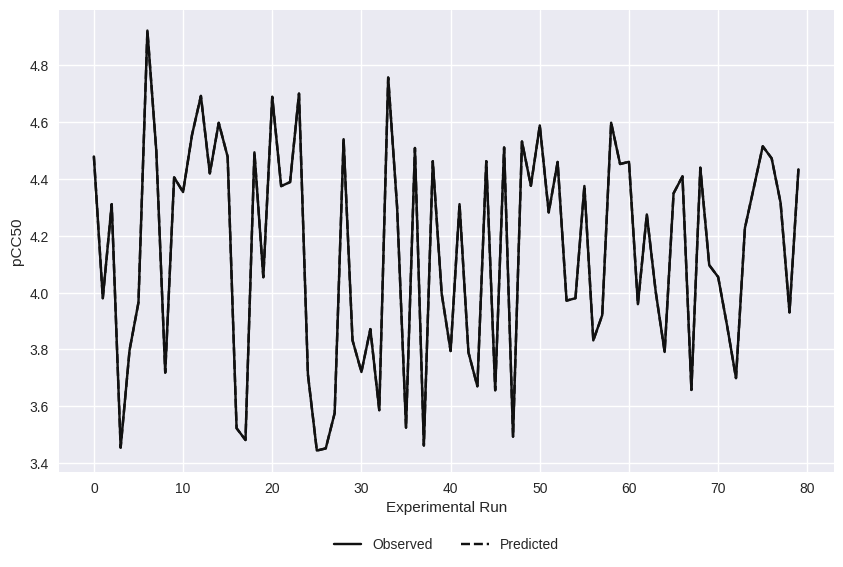

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('pCC50')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

In [ ]:
Y_test_pred = model.predict(X_test)

In [ ]:
Y_test_pred

array([3.9303689 , 3.79433559, 3.83182674, 4.55486303, 3.79723931,
       4.92299567, 4.37028467, 3.78965472, 4.05428529, 4.30137757,
       3.72053839, 3.98034377, 4.4059391 , 3.96565234, 4.09691001,
       4.47833898, 3.46157709, 3.46157709, 4.35418488, 3.99610883])

In [ ]:
len(Y_test_pred)

20

In [ ]:
predictions2 = pd.DataFrame({'Y_test' : Y_test, 'Y_test_pred' : Y_test_pred})

In [ ]:
predictions2

,Y_test,Y_test_pred
83,4.566390,3.930369
53,3.584192,3.794336
70,4.421705,3.831827
45,4.567993,4.554863
44,3.505678,3.797239
39,4.784891,4.922996
22,4.271241,4.370285
80,3.793255,3.789655
10,4.255081,4.054285
0,4.176200,4.301378


In [ ]:
print('The testing r_sq is: %.4f'% r2_score(Y_test, Y_test_pred))

The testing r_sq is: 0.1136


In [ ]:
print('The testing r_sq is: %.4f'% model.score(X_test, Y_test))

The testing r_sq is: 0.1136


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_pred))

The MAE is: 0.2763


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_pred)))

The RMSE is: 0.4034


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_pred))

The EVS is: 0.1955


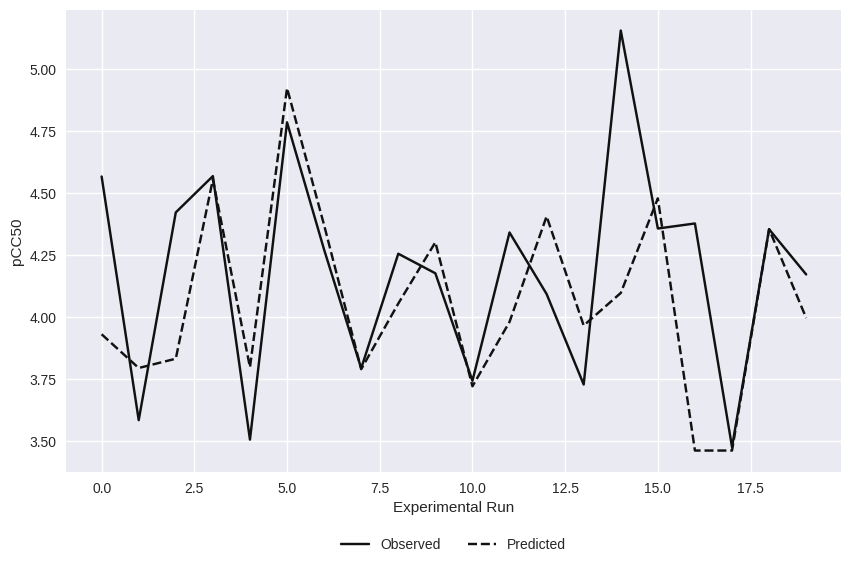

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('pCC50')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

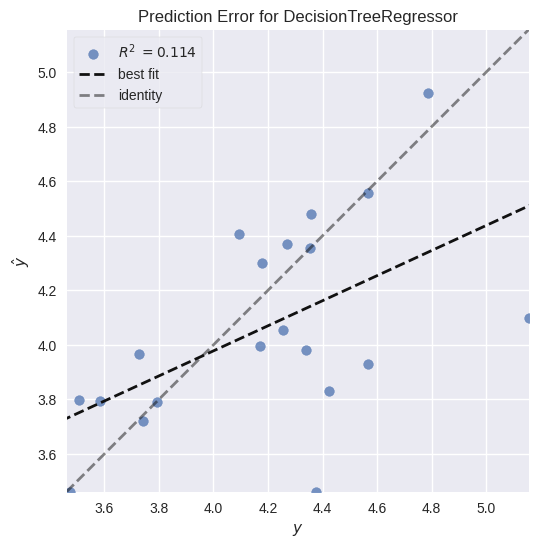

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

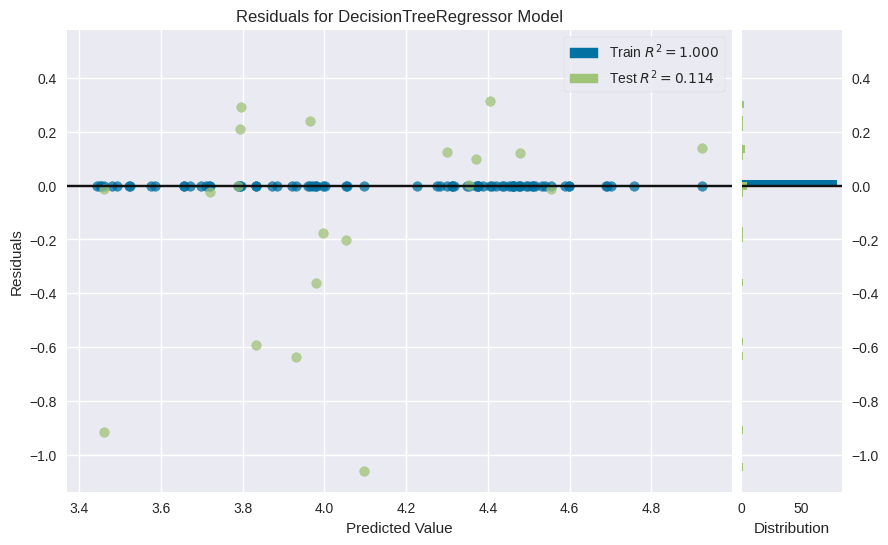

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

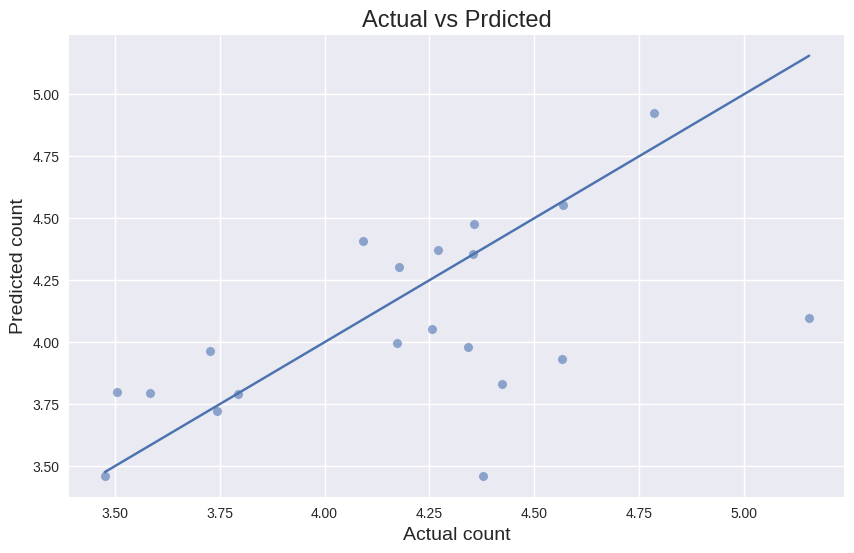

In [ ]:
sns.scatterplot(x=Y_test, y=Y_test_pred, alpha=0.6)
sns.lineplot(x=Y_test, y=Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Prdicted', fontsize = 17)
plt.show()

In [ ]:
model.score(X_test, Y_test)

0.11364154901501222

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.4

In [ ]:
my_param_grid = {'max_depth':[7,8,9], 'min_samples_split':[7,8,9], 'min_samples_leaf': [7,8,9]} 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
GridSearchCV(estimator=DecisionTreeRegressor(random_state=seed), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [7, 8, 9], 'min_samples_leaf': [7, 8, 9],
                         'min_samples_split': [7, 8, 9]},
             verbose=3)

In [ ]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(random_state=seed), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

In [ ]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=7, min_samples_leaf=7, min_samples_split=7;, score=0.365 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=7, min_samples_split=7;, score=0.425 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=7, min_samples_split=7;, score=-0.134 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=7, min_samples_split=7;, score=0.127 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=7, min_samples_split=7;, score=-0.257 total time=   0.0s
[CV 1/5] END max_depth=7, min_samples_leaf=7, min_samples_split=8;, score=0.365 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=7, min_samples_split=8;, score=0.425 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=7, min_samples_split=8;, score=-0.134 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=7, min_samples_split=8;, score=0.127 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=7

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [7, 8, 9], 'min_samples_leaf': [7, 8, 9],
                         'min_samples_split': [7, 8, 9]},
             verbose=3)

In [ ]:
grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 7, 'min_samples_split': 7}

In [ ]:
Y_test_optimised = grid.predict(X_test)

In [ ]:
Y_test_optimised

array([3.95425833, 3.95425833, 3.5498851 , 4.46382955, 3.5498851 ,
       4.61901176, 4.27991443, 4.48583754, 4.27991443, 4.29955816,
       3.5498851 , 3.91965458, 3.96298718, 3.91965458, 3.95425833,
       4.61901176, 3.5498851 , 3.5498851 , 4.27991443, 3.91965458])

In [ ]:
predictions2['Y_test_optimised'] = Y_test_optimised
predictions2.head()

,Y_test,Y_test_pred,Y_test_optimised
83,4.566390,3.930369,3.954258
53,3.584192,3.794336,3.954258
70,4.421705,3.831827,3.549885
45,4.567993,4.554863,4.463830
44,3.505678,3.797239,3.549885


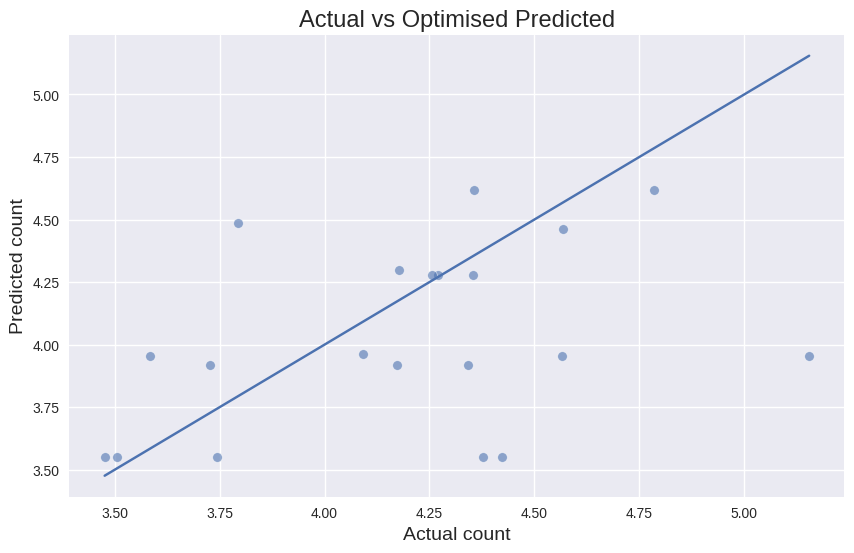

In [ ]:
sns.scatterplot(x=Y_test, y=Y_test_optimised, alpha=0.6)
sns.lineplot(x=Y_test, y=Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.show()

In [ ]:
grid.score(X_test, Y_test)

-0.18310071698541908

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_optimised)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.47

In [ ]:
print('The testing r_sq is: %.4f'% model.score(X_test, Y_test_optimised))

The testing r_sq is: 0.5667


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_optimised))

The MAE is: 0.3322


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_optimised)))

The RMSE is: 0.4661


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_optimised))

The EVS is: -0.0557


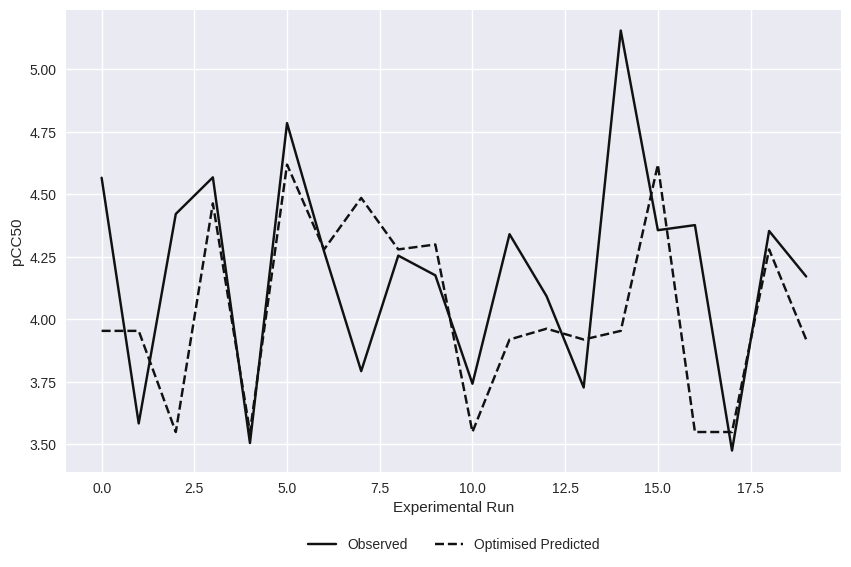

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_optimised, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('pCC50')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

In [ ]:
Y_train_optimised = grid.predict(X_train)

In [ ]:
Y_train_optimised

array([4.61901176, 3.91965458, 3.96298718, 3.5498851 , 3.5498851 ,
       3.91965458, 4.61901176, 4.48583754, 3.91965458, 3.96298718,
       4.27991443, 4.46382955, 4.61901176, 4.46382955, 4.61901176,
       4.61901176, 3.5498851 , 3.5498851 , 4.48583754, 3.95425833,
       4.46382955, 4.29955816, 4.29955816, 4.48583754, 4.27991443,
       3.5498851 , 3.5498851 , 3.96298718, 4.48583754, 3.91965458,
       3.96298718, 3.91965458, 3.5498851 , 4.61901176, 4.29955816,
       3.5498851 , 4.29955816, 3.5498851 , 4.27991443, 3.91965458,
       3.95425833, 4.48583754, 3.95425833, 3.5498851 , 4.46382955,
       3.5498851 , 4.46382955, 3.96298718, 4.48583754, 4.48583754,
       4.61901176, 4.46382955, 4.48583754, 3.96298718, 3.91965458,
       4.27991443, 3.96298718, 4.29955816, 4.29955816, 4.48583754,
       4.48583754, 3.95425833, 4.27991443, 4.29955816, 3.91965458,
       4.46382955, 4.27991443, 3.91965458, 4.46382955, 3.95425833,
       3.95425833, 3.96298718, 3.91965458, 3.91965458, 4.27991

In [ ]:
predictions1['Y_train_optimised'] = Y_train_optimised
predictions1.head()

,Y_train,Y_train_pred,Y_train_optimised
55,4.479516,4.479516,4.619012
88,3.980344,3.980344,3.919655
26,4.311580,4.311580,3.962987
42,3.454174,3.454174,3.549885
69,3.797239,3.797239,3.549885


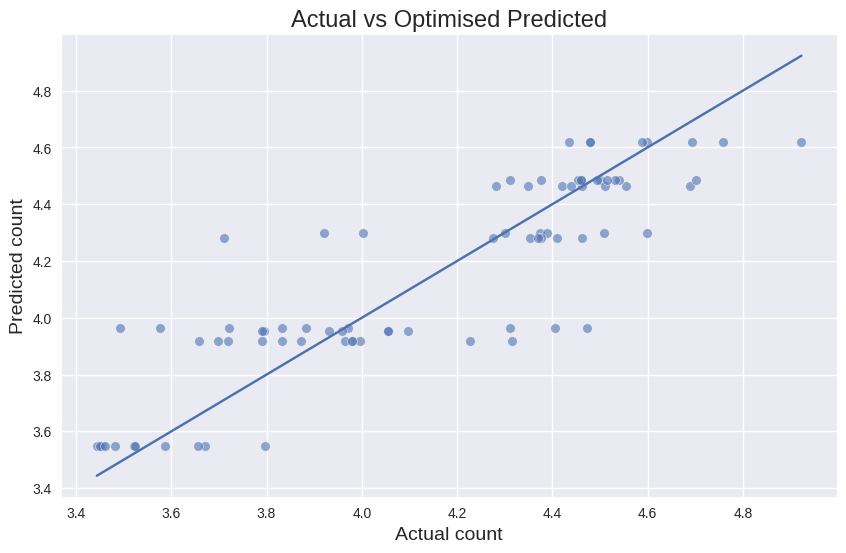

In [ ]:
sns.scatterplot(x=Y_train, y=Y_train_optimised, alpha=0.6)
sns.lineplot(x=Y_train, y=Y_train)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.show()

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train_optimised))

The training r_sq is: 0.6881


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_optimised))

The MAE is: 0.1403


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_optimised)))

The RMSE is: 0.1898


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_optimised))

The EVS is: 0.7622


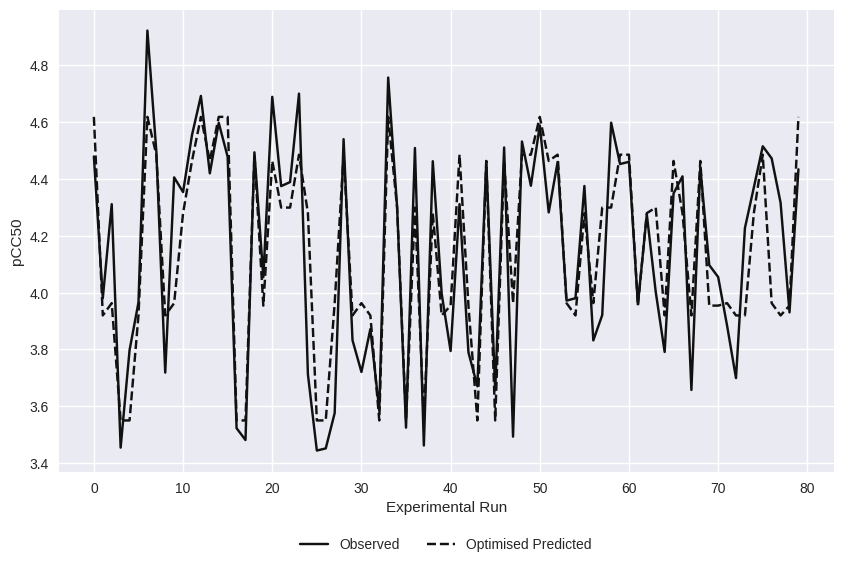

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_optimised, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('pCC50')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

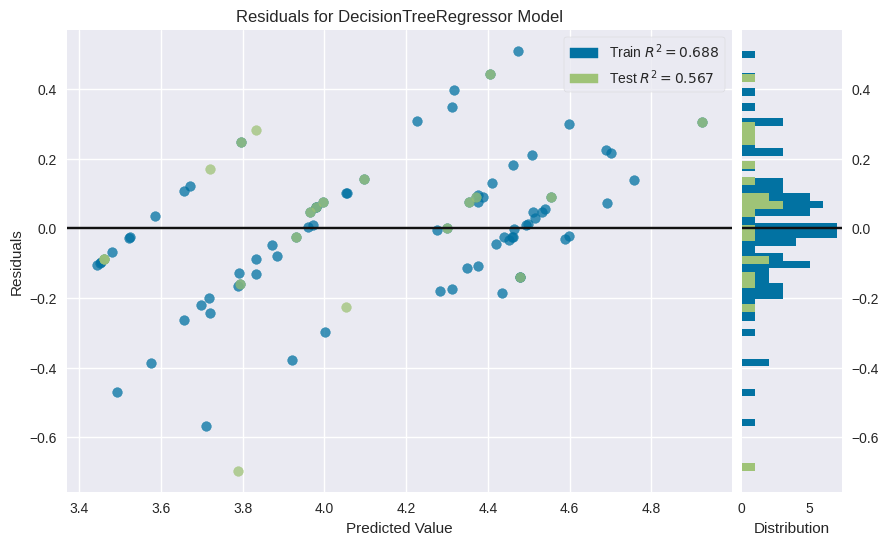

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train_optimised)
visualizer.score(X_test, Y_test_optimised)
visualizer.poof()

In [ ]:
features = list(X_train.columns)

In [ ]:
features

['ATS5i',
 'ATS7i',
 'ATS8i',
 'AATS0m',
 'AATS1m',
 'AATS2m',
 'AATS3m',
 'AATS4m',
 'AATS5m',
 'AATS6m',
 'AATS7m',
 'AATS8m',
 'AATS0v',
 'AATS1v',
 'AATS2v',
 'AATS3v',
 'AATS6v',
 'AATS4e',
 'AATS5e',
 'AATS2p',
 'AATS4p',
 'AATS6p',
 'AATS1i',
 'AATS4i',
 'AATS5i',
 'ATSC7c',
 'ATSC5v',
 'ATSC2e',
 'ATSC6p',
 'AATSC6m',
 'AATSC6i',
 'MATS1m',
 'MATS2e',
 'MATS4e',
 'GATS3c',
 'GATS4m',
 'GATS8v',
 'GATS7p',
 'Si',
 'Mare',
 'Mp',
 'Mi',
 'CrippenLogP',
 'VE1_Dt',
 'SIC5',
 'CIC1',
 'MIC2',
 'piPC7',
 'WPOL',
 'XLogP']

In [ ]:
RFR = DecisionTreeRegressor(random_state=seed, max_depth = 8, min_samples_leaf= 7, min_samples_split= 7)

In [ ]:
RFR.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=7, min_samples_split=7,
                      random_state=42)

In [ ]:
importance = RFR.feature_importances_
importance

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0104237 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04016656, 0.        , 0.        ,
       0.        , 0.        , 0.07251612, 0.        , 0.        ,
       0.        , 0.14566698, 0.        , 0.09141094, 0.        ,
       0.06904793, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.48012656, 0.09064121, 0.        ])

In [ ]:
FIM = pd.DataFrame({'features' : features, 'feature_importances' : importance})
FIM

,features,feature_importances
0,ATS5i,0.000000
1,ATS7i,0.000000
2,ATS8i,0.000000
3,AATS0m,0.000000
4,AATS1m,0.000000
5,AATS2m,0.000000
6,AATS3m,0.000000
7,AATS4m,0.000000
8,AATS5m,0.000000
9,AATS6m,0.000000


<Figure size 8000x4800 with 0 Axes>

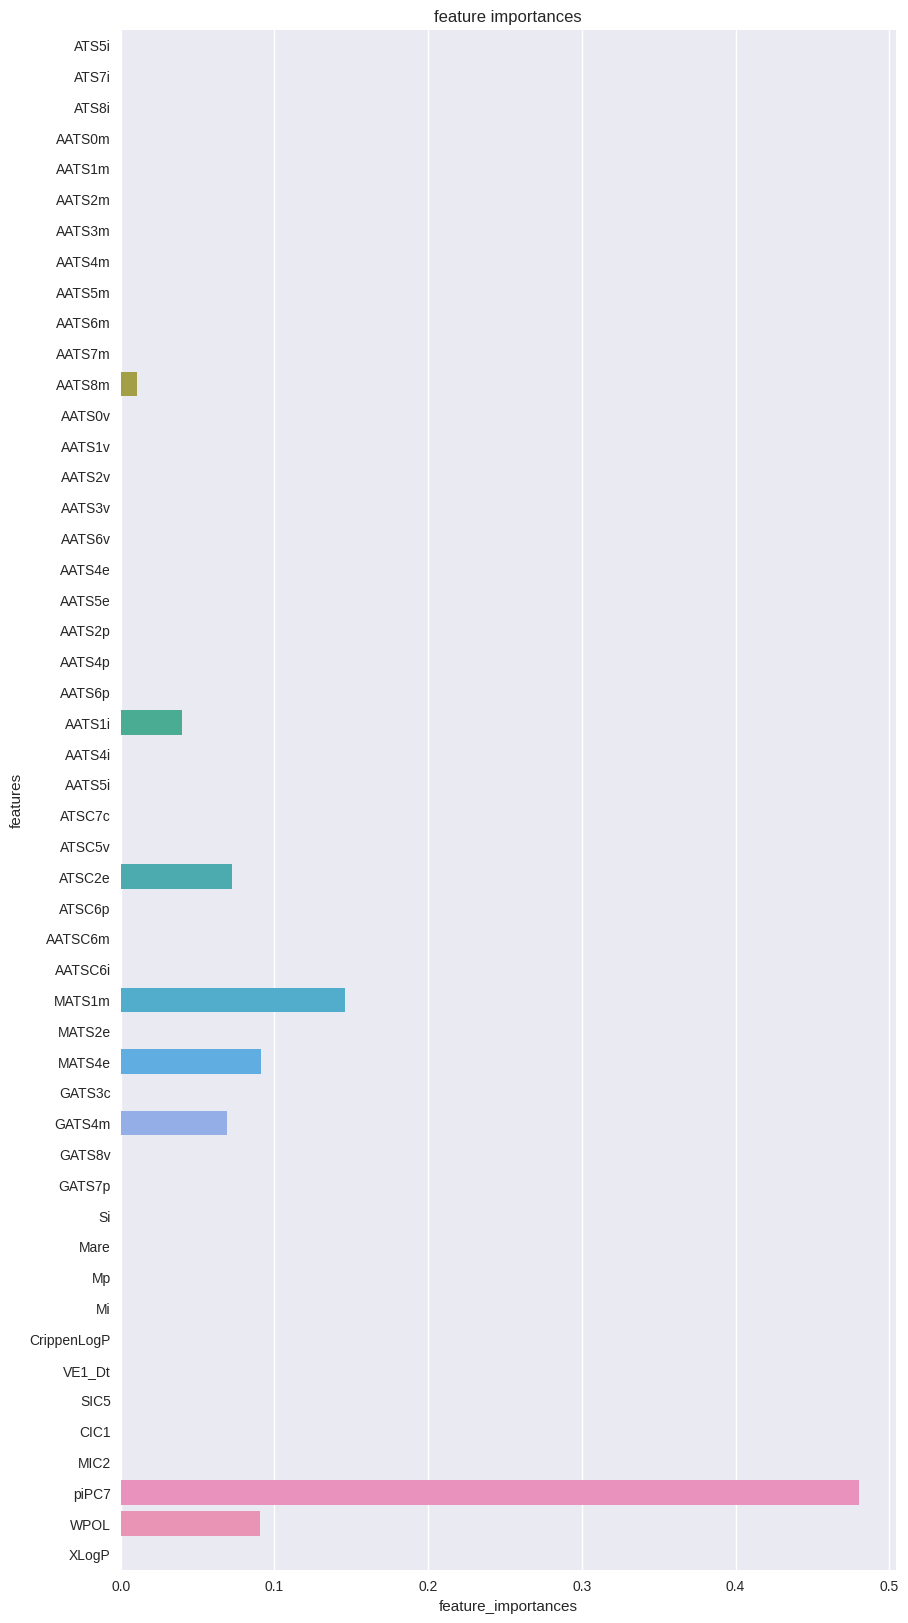

In [ ]:
fig = plt.figure(dpi=800)
plt.figure(figsize=(10,20))
plt.title('feature importances')
sns.barplot(y='features', x='feature_importances', data=FIM)
plt.show()

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap
X = df2.drop(['pCC50'],axis = 1)
explainer = shap.TreeExplainer(model,feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(X)

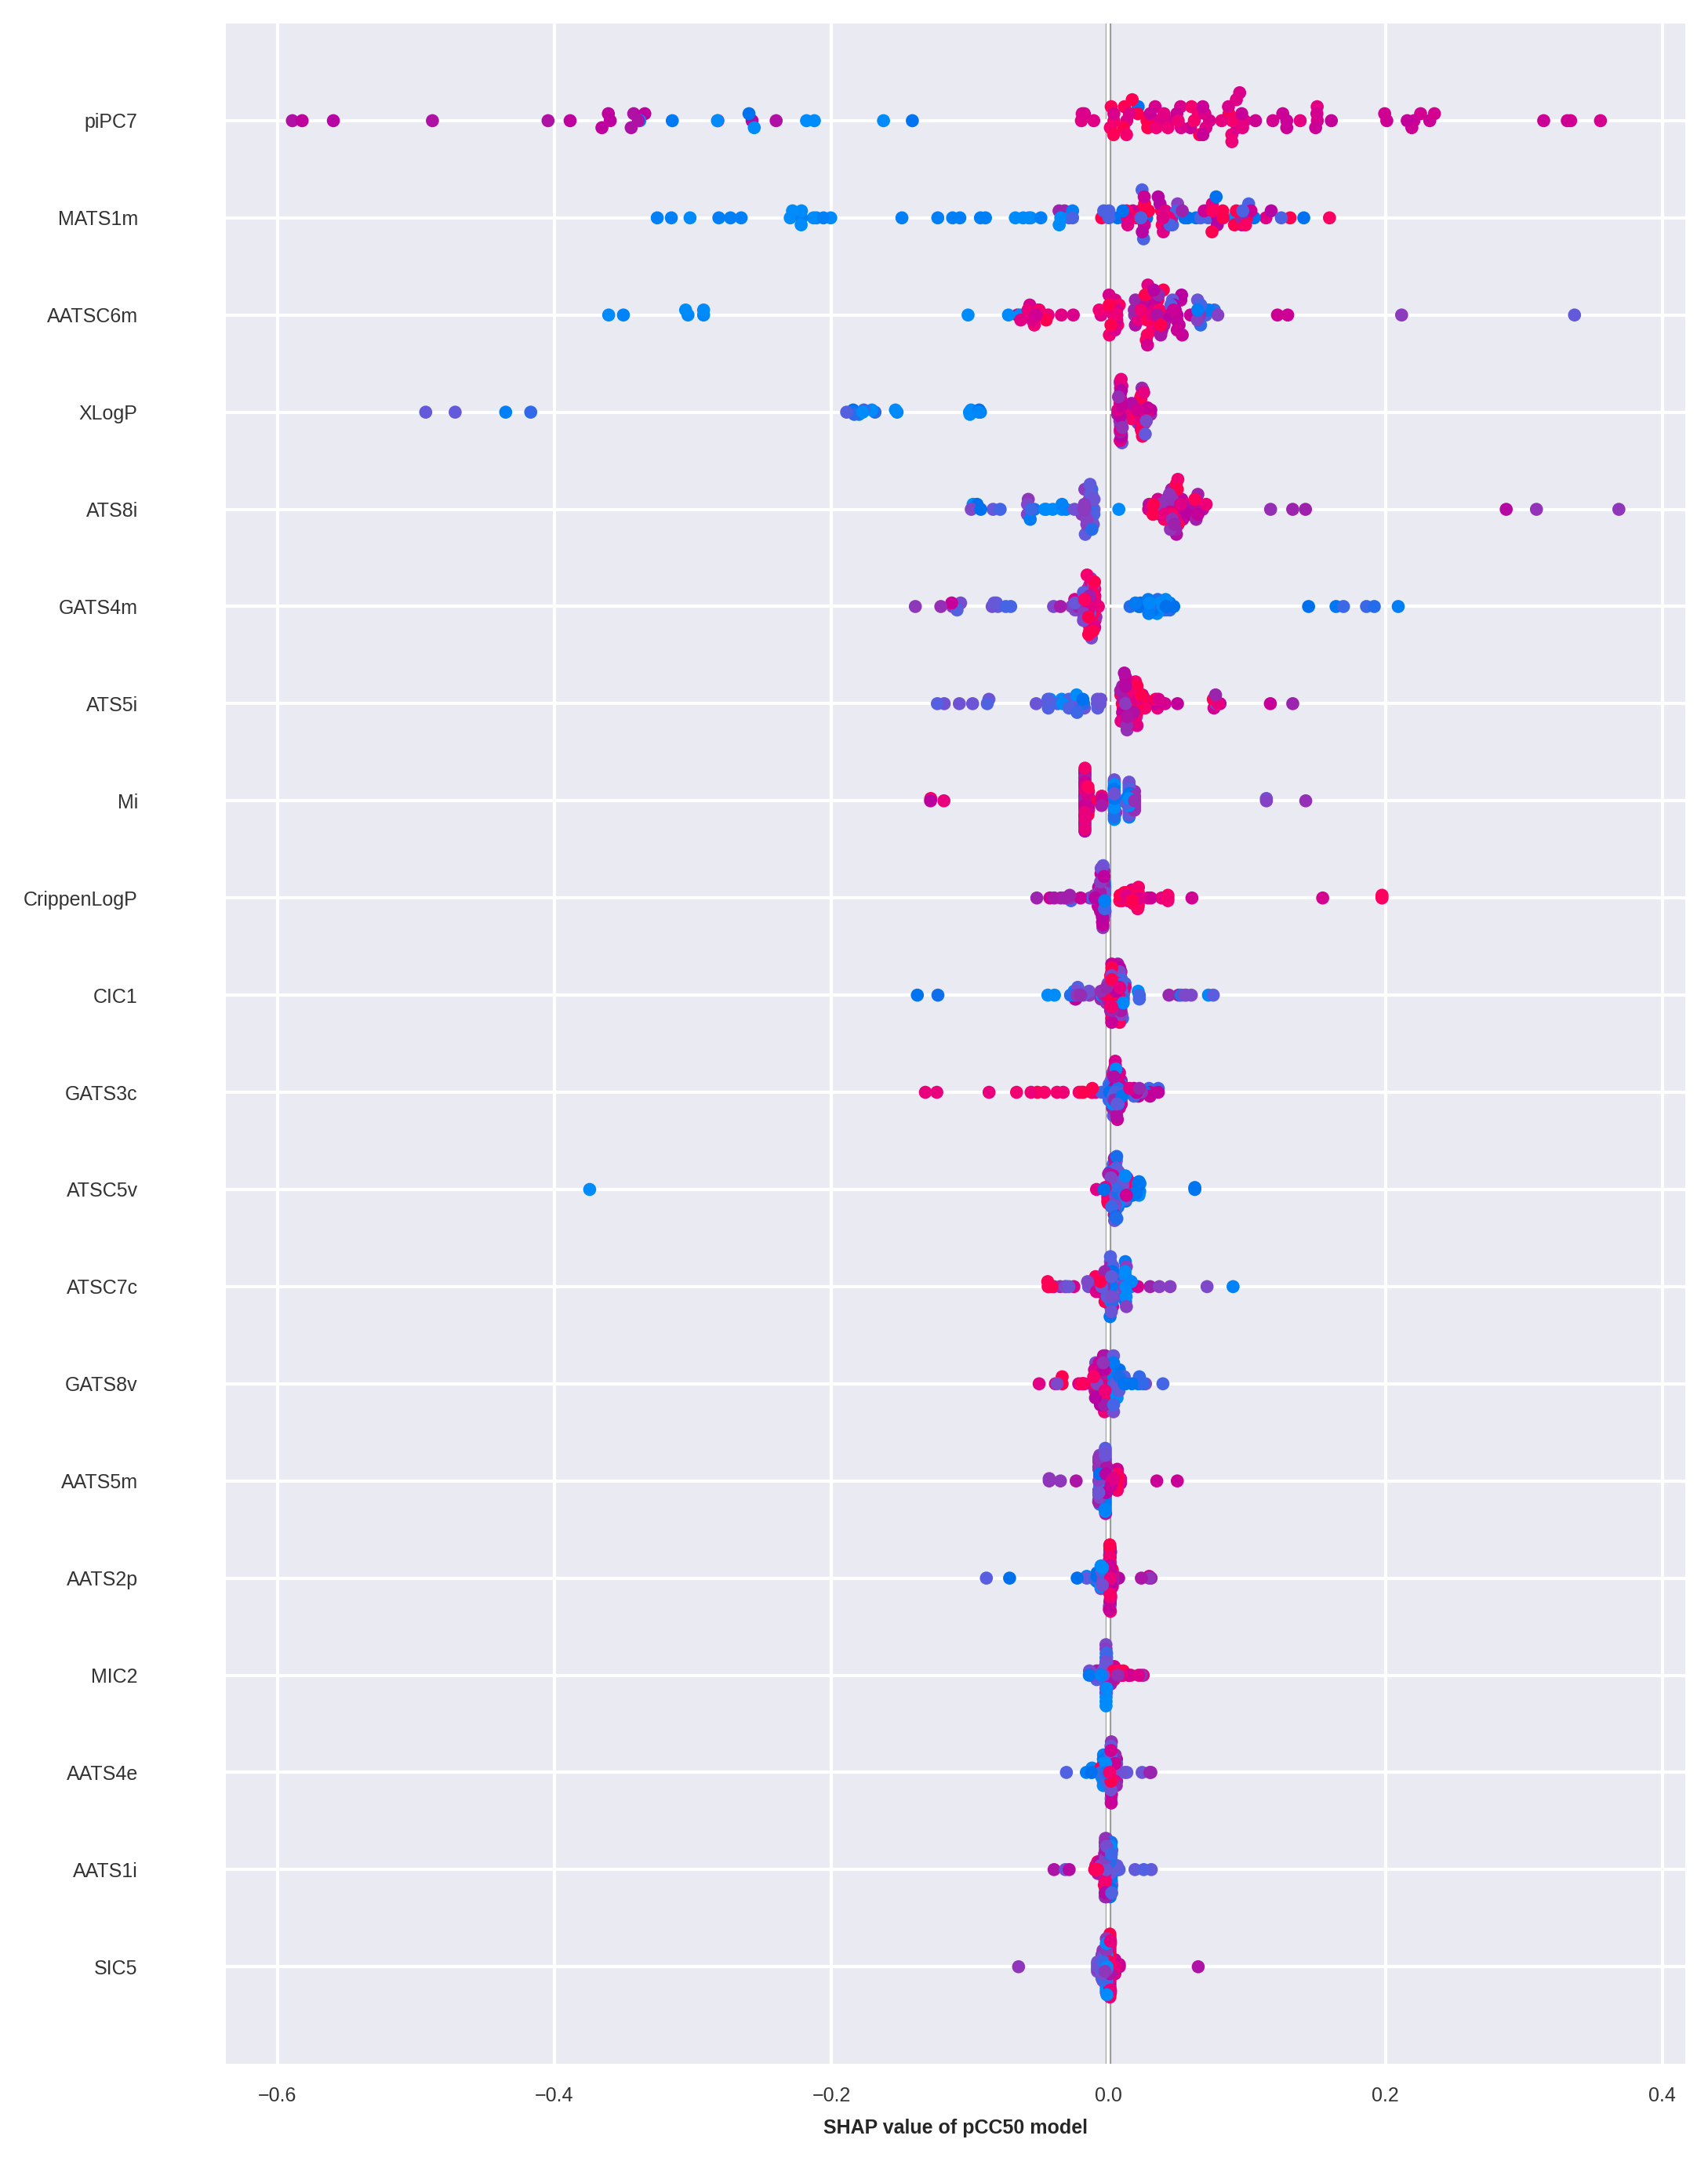

In [ ]:
plt.figure(dpi=300)
shap.summary_plot(shap_values, X,show=False,color_bar=False)
plt.xlabel("SHAP value of pCC50 model" ,fontweight='bold',fontsize=6)
plt.tick_params(labelsize=6,)
plt.show()